# Predict the sales of a store

### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot
%matplotlib inline

### Loading the data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
train['source'] = 'train'
test['source'] = 'test'
data = pd.concat([train, test], ignore_index = True)
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


### Defining the data

- Item_Identifier-	Unique product ID
- Item_Weight-	Weight of product
- Item_Fat_Content-	Whether the product is low fat or not
- Item_Visibility-	The % of total display area of all products in a store allocated to the particular product
- Item_Type-	The category to which the product belongs
- Item_MRP-	Maximum Retail Price (list price) of the product
- Outlet_Identifier-	Unique store ID
- Outlet_Establishment_Year-	The year in which store was established
- Outlet_Size-	The size of the store in terms of ground area covered
- Outlet_Location_Type-	The type of city in which the store is located
- Outlet_Type-	Whether the outlet is just a grocery store or some sort of supermarket
- Item_Outlet_Sales-	Sales of the product in the particular store. This is the outcome variable to be predicted.
 

### Investigating the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14204 entries, 0 to 14203
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            14204 non-null  object 
 1   Item_Weight                11765 non-null  float64
 2   Item_Fat_Content           14204 non-null  object 
 3   Item_Visibility            14204 non-null  float64
 4   Item_Type                  14204 non-null  object 
 5   Item_MRP                   14204 non-null  float64
 6   Outlet_Identifier          14204 non-null  object 
 7   Outlet_Establishment_Year  14204 non-null  int64  
 8   Outlet_Size                10188 non-null  object 
 9   Outlet_Location_Type       14204 non-null  object 
 10  Outlet_Type                14204 non-null  object 
 11  Item_Outlet_Sales          8523 non-null   float64
 12  source                     14204 non-null  object 
dtypes: float64(4), int64(1), object(8)
memory usag

In [4]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [5]:
data.apply(lambda x: len(x.unique()))

Item_Identifier               1559
Item_Weight                    416
Item_Fat_Content                 5
Item_Visibility              13006
Item_Type                       16
Item_MRP                      8052
Outlet_Identifier               10
Outlet_Establishment_Year        9
Outlet_Size                      4
Outlet_Location_Type             3
Outlet_Type                      4
Item_Outlet_Sales             3494
source                           2
dtype: int64

In [6]:
data.shape

(14204, 13)

In [7]:
data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
source                        object
dtype: object

In [8]:
categorical_columns = [x for x in data.dtypes.index if data.dtypes[x] == 'object']
categorical_columns = [x for x in categorical_columns if x not in ['Item_Identifier', 'source']]

for col in categorical_columns:
    print('\nFrequency of Categories for variable %s'%(col))
    print(data[col].value_counts())


Frequency of Categories for variable Item_Fat_Content
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Frequency of Categories for variable Item_Type
Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

Frequency of Categories for variable Outlet_Identifier
OUT027    1559
OUT013    1553
OUT049    1550
OUT035    1550
OUT046    1550
OUT045    1548
OUT018    1546
OUT017    1543
OUT010     925
OUT019     880
Name: Outlet_Identifier, dtype: int64

Frequency of Categories f

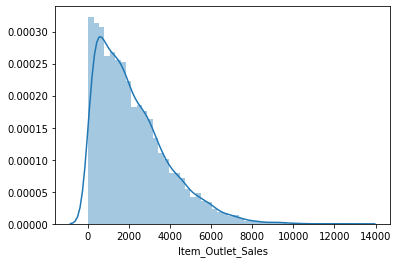

In [9]:
sns.distplot(data['Item_Outlet_Sales'])

1. deviate from the normal distribution
2. Have positive skewness
3. Show peakedness

In [10]:
print('Skewness: %f' % data['Item_Outlet_Sales'].skew())
print('Kurtosis: %f' % data['Item_Outlet_Sales'].kurt())

Skewness: 1.177531
Kurtosis: 1.615877


### Checking missing values

In [11]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

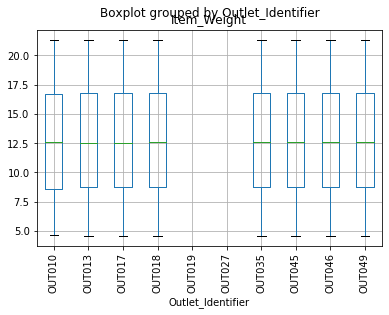

In [12]:
data.boxplot(column = 'Item_Weight', by = 'Outlet_Identifier', rot=90)

Two stores have missing weights

In [13]:
#average weight per item
item_avg_weight = data.pivot_table(values = 'Item_Weight', index = 'Item_Identifier')
item_avg_weight.head()

,Item_Weight
Item_Identifier,
DRA12,11.600
DRA24,19.350
DRA59,8.270
DRB01,7.390
DRB13,6.115


In [14]:
#create a mask of the mssing data in Item_weight
null_mask_weight = data['Item_Weight'].isnull()

In [15]:
# impute values
data.loc[null_mask_weight, 'Item_Weight'] = data.loc[null_mask_weight, 'Item_Identifier'].apply(lambda x: item_avg_weight.loc[x])

Text(0.5, 1.0, '')

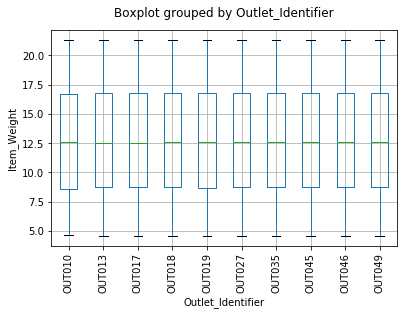

In [16]:
ax = data.boxplot(column = 'Item_Weight', by='Outlet_Identifier', rot=90)
ax.set_ylabel('Item_Weight')
ax.set_title('')

In [17]:
from scipy.stats import mode
data['Outlet_Size'] = data['Outlet_Size'].fillna('unknown')

outlet_type_mode_size = data.pivot_table(values = 'Outlet_Size', index = 'Outlet_Type', aggfunc=(lambda x:mode(x).mode[0]))
outlet_type_mode_size

,Outlet_Size
Outlet_Type,
Grocery Store,unknown
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


Text(0.5, 1.0, '')

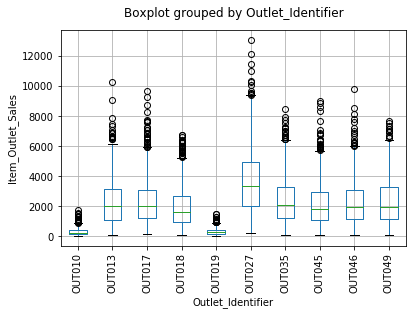

In [18]:
ax = data.boxplot(column = 'Item_Outlet_Sales', by = 'Outlet_Identifier', rot = 90)
ax.set_ylabel('Item_Outlet_Sales')
ax.set_title('')

In [19]:
outlet_type_mode_size.loc['Grocery Store'] = 'Small'
outlet_type_mode_size

,Outlet_Size
Outlet_Type,
Grocery Store,Small
Supermarket Type1,Small
Supermarket Type2,Medium
Supermarket Type3,Medium


#### Minimum value of item_visibility

In [20]:
#Determine average visibility of a product
visibility_avg = data.pivot_table(values='Item_Visibility', index='Item_Identifier')

#Impute 0 values with mean visibility of that product:
missing_values = (data['Item_Visibility'] == 0)

print ('Number of 0 values initially: %d'%sum(missing_values))
data.loc[missing_values,'Item_Visibility'] = data.loc[missing_values,'Item_Identifier'].apply(lambda x: visibility_avg.at[x, 'Item_Visibility'])
print ('Number of 0 values after modification: %d'%sum(data['Item_Visibility'] == 0))

Number of 0 values initially: 879
Number of 0 values after modification: 0


### Create a broad category of Type of Item

In [21]:
#Get the first two characters of ID:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
#Rename them to more intuitive categories:
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food',
                                                             'NC':'Non-Consumable',
                                                             'DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

#### modify categories of Item_fat_Cotent

In [22]:
data['Item_Fat_Content'] = data['Item_Fat_Content'].str.lower()
data.replace(to_replace=['lf', 'reg'], value=['low fat', 'regular'], inplace = True)

### Checking duplicate data

In [23]:
data_d = data.copy()
data_d.drop_duplicates(subset = None, inplace = True)

In [24]:
data_d.shape, data.shape

((14204, 14), (14204, 14))

In [25]:
del data_d
data.shape

(14204, 14)

No duplicate values present.

### Exploratory data analysis

In [26]:
data.corr()['Item_Outlet_Sales'].sort_values()

Item_Visibility             -0.128453
Outlet_Establishment_Year   -0.049135
Item_Weight                  0.013261
Item_MRP                     0.567574
Item_Outlet_Sales            1.000000
Name: Item_Outlet_Sales, dtype: float64

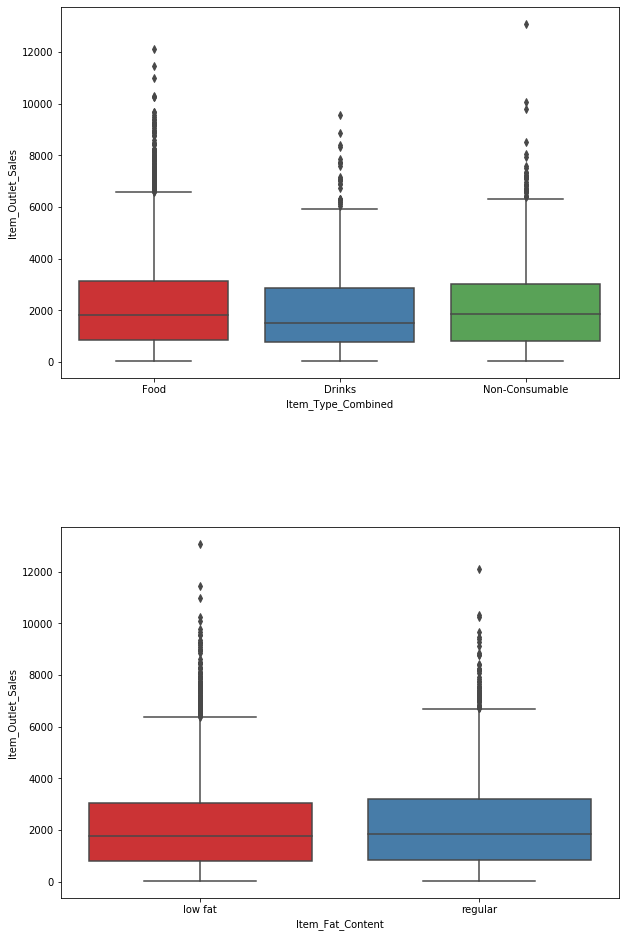

In [27]:
plt.figure(figsize = (10,9))

plt.subplot(211)
sns.boxplot(x='Item_Type_Combined', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplot(212)
sns.boxplot(x='Item_Fat_Content', y='Item_Outlet_Sales', data=data, palette="Set1")

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 1.5)

plt.show()


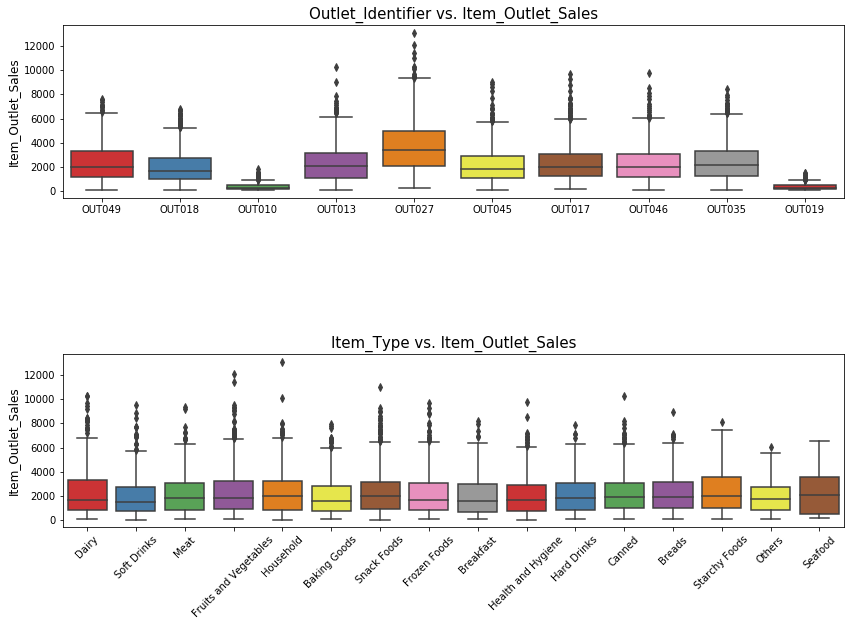

In [28]:
plt.figure(figsize = (14,9))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.9, top = 0.9)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()


## Feature Engineering

In [29]:
data.index = data['Outlet_Establishment_Year']
data.index

Int64Index([1999, 2009, 1999, 1998, 1987, 2009, 1987, 1985, 2002, 2007,
            ...
            1999, 1999, 2009, 1997, 1999, 1997, 2009, 2002, 2007, 2002],
           dtype='int64', name='Outlet_Establishment_Year', length=14204)

In [30]:
df = data.loc[:,['Item_Outlet_Sales']]
df.head(2)

,Item_Outlet_Sales
Outlet_Establishment_Year,
1999,3735.1380
2009,443.4228


In [31]:
data['Outlet_Years'] = 2009 - data['Outlet_Establishment_Year']
data['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

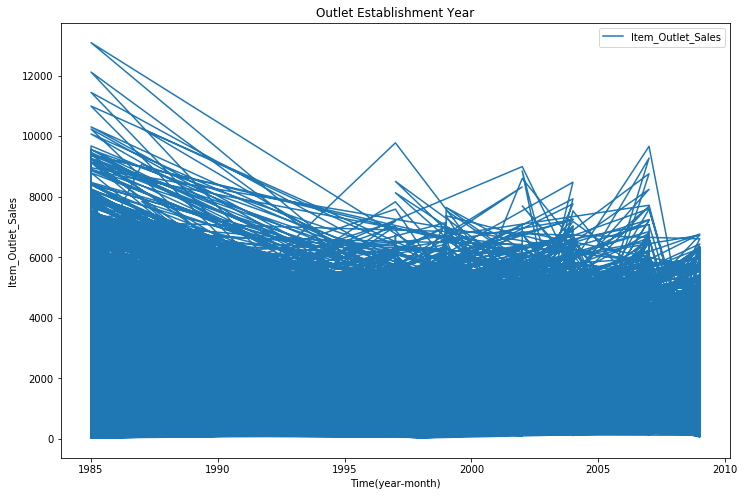

In [32]:
data.index = data['Outlet_Establishment_Year']
df = data.loc[:,['Item_Outlet_Sales']]
ts = df['Item_Outlet_Sales']
plt.figure(figsize=(12,8))
plt.plot(ts, label='Item_Outlet_Sales')
plt.title('Outlet Establishment Year')
plt.xlabel('Time(year-month)')
plt.ylabel('Item_Outlet_Sales')
plt.legend(loc = 'best')
plt.show()

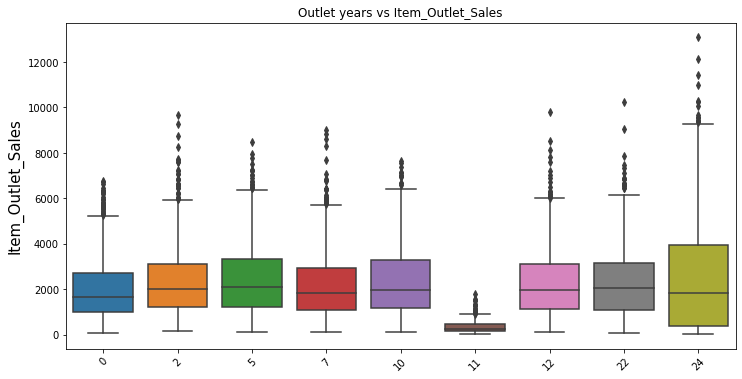

In [33]:
plt.figure(figsize = (12,6))
ax = sns.boxplot(x = 'Outlet_Years', y = 'Item_Outlet_Sales', data = data)
ax.set_xticklabels(ax.get_xticklabels(), rotation = 45)
ax.set_title('Outlet years vs Item_Outlet_Sales')
ax.set_xlabel('', fontsize = 15)
ax.set_ylabel('Item_Outlet_Sales', fontsize = 15)

plt.show()

In [34]:
temp_data = data.loc[data['Outlet_Establishment_Year'] == 1998]

In [35]:
temp_data['Outlet_Type'].value_counts()

Grocery Store    925
Name: Outlet_Type, dtype: int64

In [36]:
test_temp_data = test.loc[test['Outlet_Establishment_Year'] == 1998]
test_temp_data['Outlet_Type'].value_counts()

Grocery Store    370
Name: Outlet_Type, dtype: int64

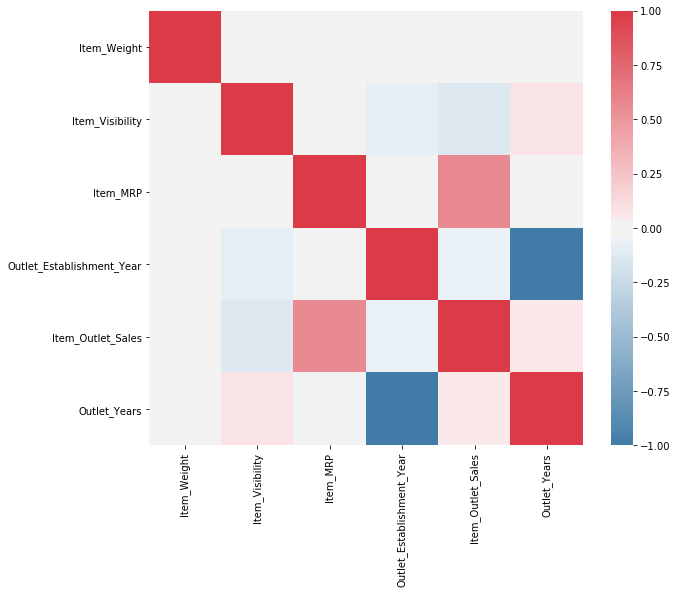

In [37]:
f, ax = plt.subplots(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap = sns.diverging_palette(240,10,as_cmap=True), square=True, ax=ax)

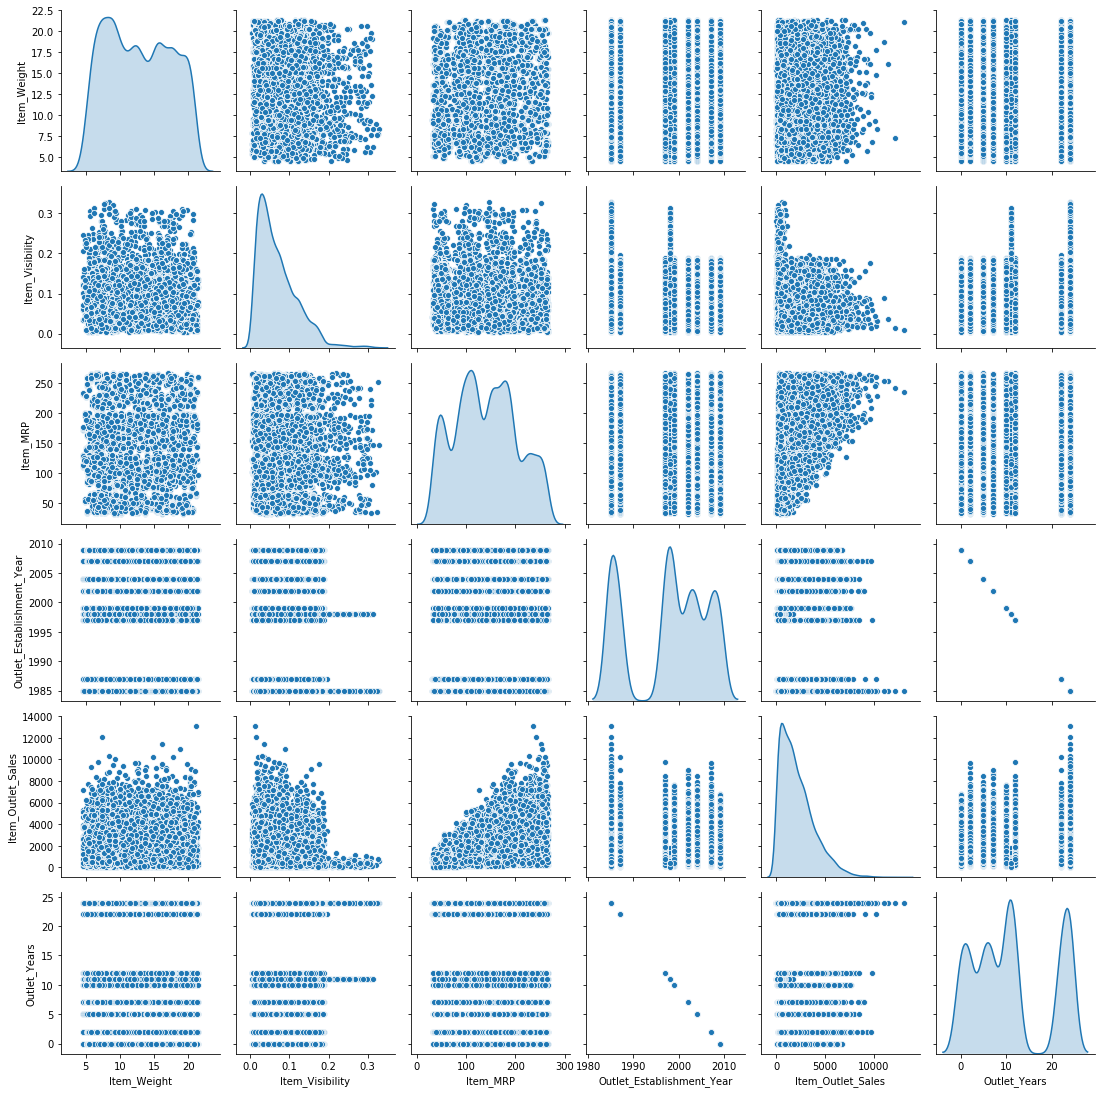

In [38]:
sns.pairplot(data, diag_kind = 'kde')
plt.show()

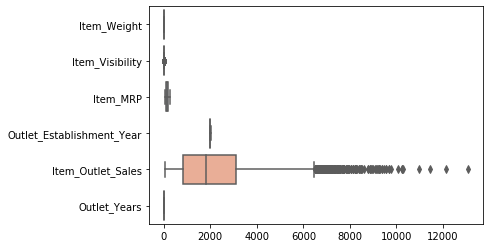

In [39]:
sns.boxplot(data = data, palette = 'coolwarm', orient = 'h')

### Are there any outliers?

#### Detecting outliers using z score

In [40]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Outlet_Years
Outlet_Establishment_Year,,,,,,,,,,,,,,,
1999,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,10
2009,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,0
1999,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,10
1998,FDX07,19.20,regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,unknown,Tier 3,Grocery Store,732.3800,train,Food,11
1987,NCD19,8.93,low fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,22


In [41]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Outlet_Years
Outlet_Establishment_Year,,,,,,,,,,,,,,,
1999,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,10
2009,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,0
1999,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,10
1998,FDX07,19.20,regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,unknown,Tier 3,Grocery Store,732.3800,train,Food,11
1987,NCD19,8.93,low fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,22


In [42]:
from scipy import stats

In [43]:
data_num = data.drop(columns =['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type', 'source', 'Item_Type_Combined'])
z = np.abs(stats.zscore(data_num))
print(z)

[[0.75101393 1.07916105 1.75251118 0.13968068        nan 0.13968068]
 [1.47765312 1.01418665 1.4936965  1.3342284         nan 1.3342284 ]
 [1.01183853 1.06482701 0.00987397 0.13968068        nan 0.13968068]
 ...
 [0.60052652 0.07679953 0.35855788 0.49804499        nan 0.49804499]
 [0.53887812 0.3754667  1.18574722 1.09531886        nan 1.09531886]
 [0.70801753 0.70406916 0.98589388 0.49804499        nan 0.49804499]]


In [44]:
threshold = 3
print(np.where(z>3))

(array([   49,    83,   108,   174,   434,   502,   521,   532,   847,
         854,  1159,  1272,  1291,  1311,  1324,  1434,  1496,  1501,
        1560,  1575,  1644,  1651,  1805,  1827,  1841,  2088,  2122,
        2251,  2324,  2439,  2445,  2586,  2613,  2728,  2855,  2895,
        3017,  3206,  3399,  3458,  3474,  3488,  3497,  3540,  3750,
        3767,  3884,  3993,  4006,  4219,  4382,  4408,  4530,  4656,
        4674,  4789,  4941,  4987,  5031,  5150,  5287,  5374,  5732,
        5734,  5795,  5837,  5880,  5891,  5946,  6008,  6012,  6179,
        6536,  6576,  6622,  6674,  6786,  6903,  7005,  7088,  7107,
        7121,  7215,  7250,  7278,  7388,  7499,  7558,  7603,  7744,
        7866,  7949,  8194,  8215,  8273,  8345,  8432,  8569,  8599,
        8601,  8612,  8661,  8856,  8908,  8997,  9066,  9160,  9381,
        9394,  9569,  9714,  9779,  9793,  9934, 10039, 10070, 10100,
       10139, 10233, 10335, 10346, 10380, 10438, 10442, 10542, 10702,
       10753, 10888

C:\Users\91882\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in greater
  


#### Working and removing outliers

#### Z_score

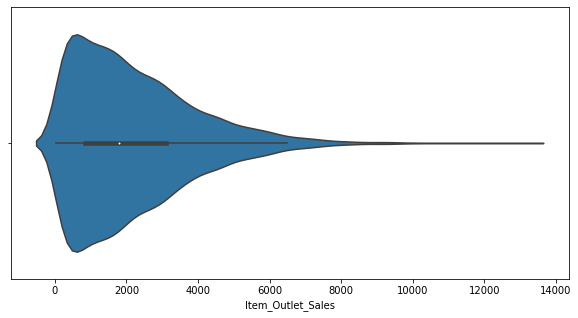

In [45]:
plt.figure(figsize=(10,5))
sns.violinplot(x='Item_Outlet_Sales', data=data)
plt.show()

In [46]:
data.pivot_table(values = 'Item_Outlet_Sales', index = 'Outlet_Type')
data.pivot_table(values = 'Item_Outlet_Sales', index = 'Item_Type')
data.pivot_table(values = 'Item_Outlet_Sales', index = 'Item_Fat_Content')
data.pivot_table(values = 'Item_Outlet_Sales', index = 'Outlet_Identifier')

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,339.351662
OUT013,2298.995256
OUT017,2340.675263
OUT018,1995.498739
OUT019,340.329723
OUT027,3694.038558
OUT035,2438.841866
OUT045,2192.384798
OUT046,2277.844267


#### Numerical and One-Hot Coding of Categorical variables

### Creating dummies

In [47]:
data.Item_Fat_Content.value_counts()
data.Item_Type.value_counts()
data.Outlet_Identifier.value_counts()
data.Outlet_Size.value_counts()

Medium     4655
unknown    4016
Small      3980
High       1553
Name: Outlet_Size, dtype: int64

In [48]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Item_Type_Combined,Outlet_Years
Outlet_Establishment_Year,,,,,,,,,,,,,,,
1999,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,Food,10
2009,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,Drinks,0
1999,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,Food,10
1998,FDX07,19.20,regular,0.017834,Fruits and Vegetables,182.0950,OUT010,1998,unknown,Tier 3,Grocery Store,732.3800,train,Food,11
1987,NCD19,8.93,low fat,0.009780,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,Non-Consumable,22


In [51]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type',
                              'Item_Type_Combined','Item_Type', 'Outlet_Identifier'])

In [52]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_Years                           int64
Item_Fat_Content_low fat               uint8
Item_Fat_Content_regular               uint8
Outlet_Location_Type_Tier 1            uint8
Outlet_Location_Type_Tier 2            uint8
Outlet_Location_Type_Tier 3            uint8
Outlet_Size_High                       uint8
Outlet_Size_Medium                     uint8
Outlet_Size_Small                      uint8
Outlet_Size_unknown                    uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Type_Supermarket Type3          uint8
Item_Type_Combined_Drinks              uint8
Item_Type_

In [53]:
#Drop the columns which have been converted to different types:
data.drop(['Outlet_Establishment_Year'],axis=1,inplace=True)

#Divide into test and train:
train = data.loc[data['source']=="train"]
test = data.loc[data['source']=="test"]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

C:\Users\91882\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Train-test split

In [54]:
y = train['Item_Outlet_Sales']
X = train.iloc[: , 1:].drop(columns = ['Item_Outlet_Sales'])

In [55]:
from sklearn.model_selection import train_test_split

In [56]:
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.75, random_state = 5) 

In [57]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('y_train: ', y_train.shape)
print('y_test: ', y_test.shape)

X_train:  (6392, 46)
X_test:  (2131, 46)
y_train:  (6392,)
y_test:  (2131,)


### Training the model

In [58]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model_lr = LinearRegression()
model_dt =  DecisionTreeRegressor()
model_rf = RandomForestRegressor()

In [59]:
pd.to_numeric(y)
X['Item_Weight'] = pd.to_numeric(X['Item_Weight'], errors= 'coerce')
X = X.apply(pd.to_numeric)

In [60]:
model_lr.fit(X_train, y_train)
model_dt.fit(X_train, y_train)
model_rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [61]:
model_lr.predict(X_test)
model_dt.predict(X_test)
model_rf.predict(X_test)

array([2243.852528,  296.454108,  809.765934, ...,  904.682382,
       3500.862954, 3748.274234])

## Evaluating the accuracy of the model

In [62]:
print('Linear Regression score: ', model_lr.score(X_test, y_test))
print('Decision Tree score: ' ,model_dt.score(X_test, y_test))
print('Random Forest score: ',model_rf.score(X_test, y_test))

Linear Regression score:  0.5616268255727153
Decision Tree score:  0.16422015435617365
Random Forest score:  0.5599308848192732


### Using cross validation method

In [63]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
folds = StratifiedKFold(n_splits = 10)

In [64]:
print('Linear Regression cross validation score: ',cross_val_score(model_lr, X, y))
print('Decision Tree cross validation score: ',cross_val_score(model_dt, X, y))
print('Random Forest score: ',cross_val_score(model_rf, X, y))

Linear Regression cross validation score:  [0.56958823 0.55161392 0.54557054 0.56361528 0.56316873]
Decision Tree cross validation score:  [0.20505908 0.12489297 0.07575081 0.20408212 0.1848244 ]
Random Forest score:  [0.57800267 0.53635441 0.52194379 0.57034912 0.57616347]
